# **TELCO CUSTOMER CHURN PREDICTION**
Alpha Team:
- Alfidhiya Amany Ramli
- Hans Darmawan
- Abednego Andries

## 📖 **Library Import**

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
# Selalu pakai ketika ingin pakai pipeline tetapi ada step balancing data
from imblearn.pipeline import Pipeline

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN


# cross validation
from sklearn.model_selection import cross_val_score, cross_validate


# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# XGBoost
from xgboost.sklearn import XGBClassifier

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, make_scorer, fbeta_score

# Model Interpretation
import shap
import lime

# MSNO
import missingno as msno

# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

# VIF Checker
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 🔄️ **Workflow in CRISP-DM**
1. 

## **1. Business Understanding and Problem Framing**

### 📕 **Introduction**


### 😩 **Problem Framing**


### 🚀 **Objectives**



## **2. Data Understanding**
| **Column Name**    | **Description**                                                                                                                               |
| ------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| `customerID`       | ID pelanggan                                                                                                                                  |
| `gender`           | Jenis kelamin pelanggan  <br>    • Male  <br>    • Female                                                                                     |
| `SeniorCitizen`    | Apakah pelanggan adalah warga senior  <br>    • 1 = ya  <br>    • 0 = tidak                                                                   |
| `Partner`          | Apakah pelanggan memiliki pasangan  <br>    • Yes  <br>    • No                                                                               |
| `Dependents`       | Apakah pelanggan memiliki tanggungan  <br>    • Yes  <br>    • No                                                                             |
| `tenure`           | Lama berlangganan (dalam bulan)                                                                                                               |
| `PhoneService`     | Apakah memiliki layanan telepon rumah  <br>    • Yes  <br>    • No                                                                            |
| `MultipleLines`    | Layanan saluran telepon tambahan  <br>    • Yes  <br>    • No  <br>    • No phone service                                                     |
| `InternetService`  | Jenis layanan internet  <br>    • DSL  <br>    • Fiber optic  <br>    • No                                                                    |
| `OnlineSecurity`   | Keamanan online  <br>    • Yes  <br>    • No  <br>    • No internet service                                                                   |
| `OnlineBackup`     | Cadangan data online  <br>    • Yes  <br>    • No  <br>    • No internet service                                                              |
| `DeviceProtection` | Perlindungan perangkat  <br>    • Yes  <br>    • No  <br>    • No internet service                                                            |
| `TechSupport`      | Dukungan teknis  <br>    • Yes  <br>    • No  <br>    • No internet service                                                                   |
| `StreamingTV`      | Layanan TV streaming  <br>    • Yes  <br>    • No  <br>    • No internet service                                                              |
| `StreamingMovies`  | Layanan film streaming  <br>    • Yes  <br>    • No  <br>    • No internet service                                                            |
| `Contract`         | Jenis kontrak langganan  <br>    • Month-to-month  <br>    • One year  <br>    • Two year                                                     |
| `PaperlessBilling` | Apakah menggunakan tagihan tanpa kertas  <br>    • Yes  <br>    • No                                                                          |
| `PaymentMethod`    | Metode pembayaran  <br>    • Electronic check  <br>    • Mailed check  <br>    • Bank transfer (automatic)  <br>    • Credit card (automatic) |
| `MonthlyCharges`   | Biaya bulanan langganan                                                                                                                       |
| `TotalCharges`     | Total seluruh biaya yang telah dibayar                                                                                                        |
| `Churn`            | Status berhenti langganan  <br>    • Yes  <br>    • No                                                                                        |

### **Load Dataset**

In [41]:
df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Data Cleansing**

In [42]:
# Cek Jumlah Baris Data dan Jumlah Kolom Data
df.shape

(7043, 21)

In [43]:
# Cek Missing Values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
# Cek Data Duplikat
df.duplicated().sum()

0

In [45]:
# Cek Ringkasan Statistik
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


> TotalCharges tidak muncul, kemungkinan terdapat data non numerik

> tenure adalah lama berlangganan layanan Telco. Terdapat tenure yang bernilai 0 bulan. Perlu dicek.

In [46]:
df[df['tenure'] < 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


> Terdapat 11 baris data yang memiliki nilai tenure 0 dengan TotalCharges yang kosong tidak terisi.

> Argumen: Tidak masuk akal untuk memiliki tenure 0. Sebab, pada kasus berlangganan jika telah mendaftar maka seharusnya telah terhitung 1 bulan dan pastinya sudah memiliki MonthlyCharges dan TotalCharges sekaligus. 11 Data tersebut dianggap anomali sehingga akan dihapus.

In [47]:
df = df[df['tenure'] > 0]

In [48]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [49]:
# Mengubah kolom tertentu menjadi tipe data kategorikal
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [50]:
num_cols = ['MonthlyCharges', 'TotalCharges']
df[num_cols] = df[num_cols].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [51]:
# Cek Missing Value setelah ubah tipe data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Exploratory Data Analysis (EDA)**
- Bagaimana distribusi data kolom numerik?
- Apakah terdapat outlier?
- Bagaimana proporsi kelas target?
- Bagaimana distribusi target Churn vs Not Churn berdasarkan karateristik kategorikal nya?
- Bagaimana korelasi antara setiap fitur dengan target?

#### **Bagaimana ringkasan statistik data?**

In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


#### **Bagaimana distribusi data kolom numerik?**

In [53]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
pvals = []
normality = []

for i in num_cols:
    stats, pvalue = shapiro(df[i])
    pvals.append(pvalue)
    if pvalue > 0.05:
        normality.append('Normal')
    else:
        normality.append('Not Normal')

normality_check = pd.DataFrame({'Columns' : num_cols,
                               'P-Value' : pvals,
                               'Normal or Not' : normality})

normality_check

,Columns,P-Value,Normal or Not
0,tenure,8.316230e-55,Not Normal
1,MonthlyCharges,2.427485e-51,Not Normal
2,TotalCharges,1.051405e-61,Not Normal


> Distribusi data numerik pada kolom tenure, MonthlyCharges, dan TotalCharges ketiganya tidak normal.

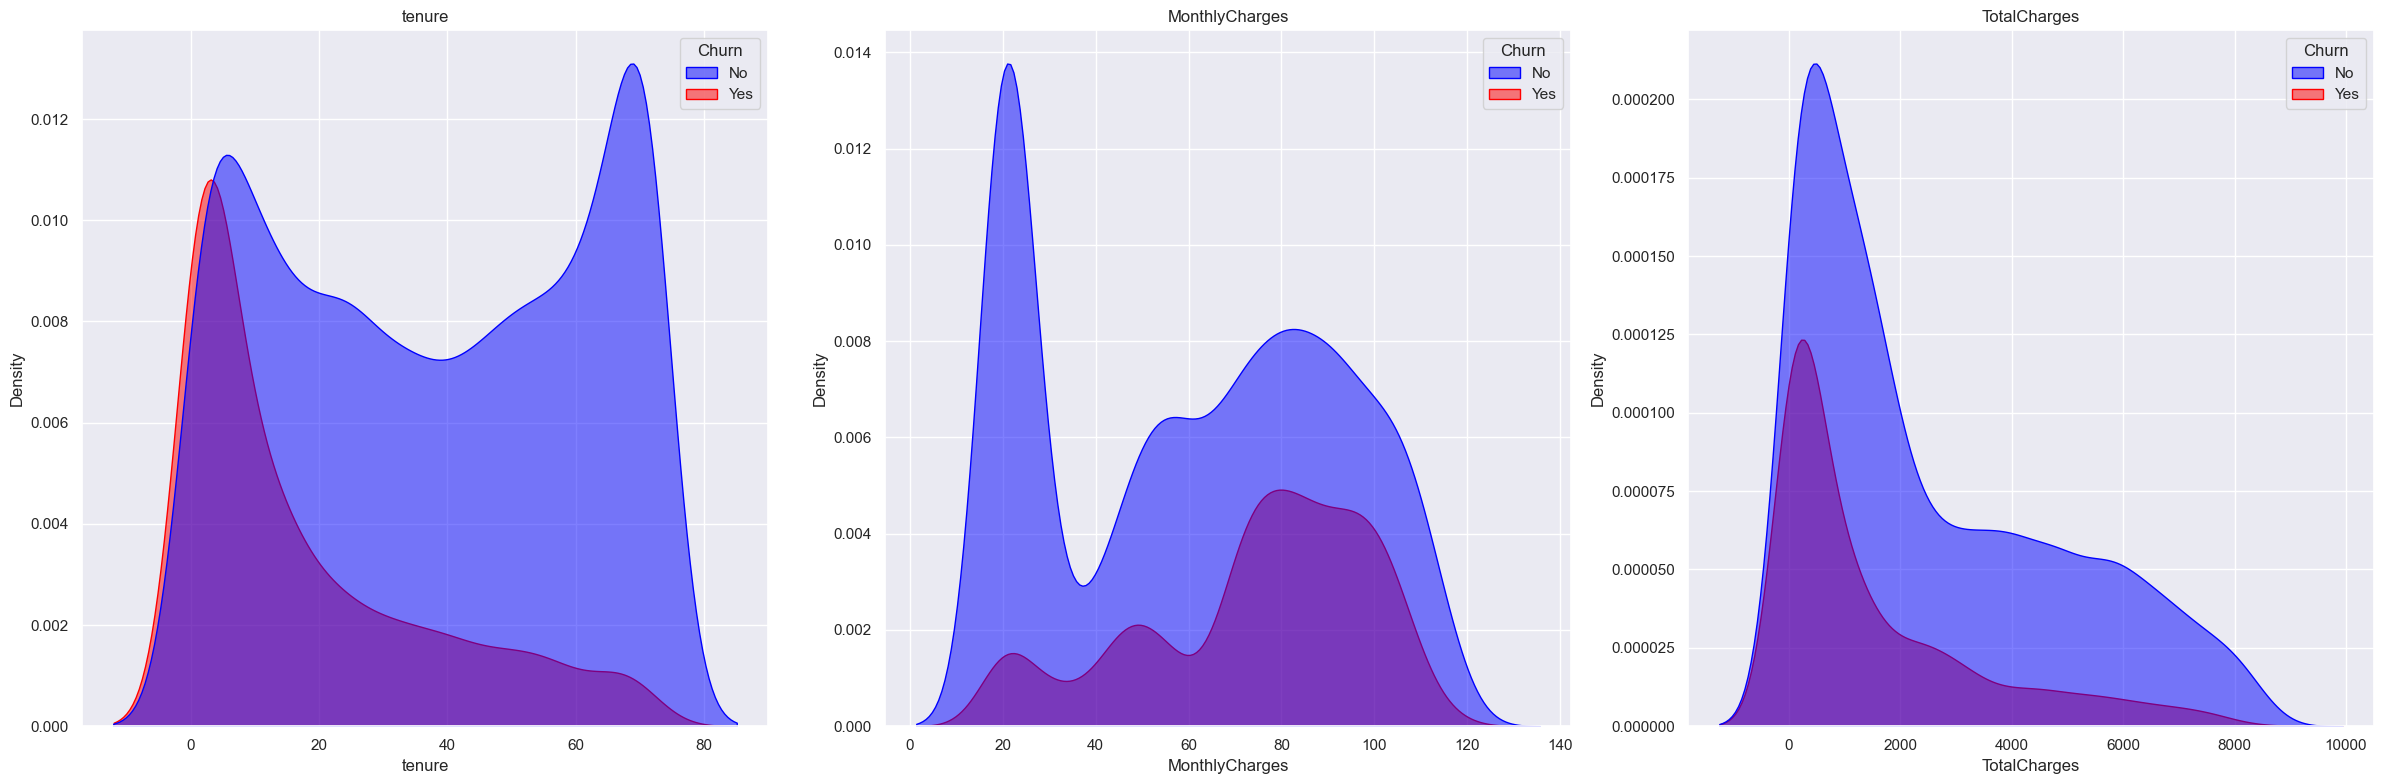

In [54]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(24, 8))
plotnumber = 1

for i in num_cols:
    ax = plt.subplot(1, 3, plotnumber)
    sns.kdeplot(data=df, x=i, hue='Churn', fill=True, palette=['Blue', 'Red'], alpha=0.5);
    plt.xlabel(i)
    plt.title(i)
    plotnumber += 1
    plt.tight_layout();

> Berdasarkan kolom tenure, densitas pelanggan Churn paling tinggi terjadi pada tenure yang cukup rendah. Ini menandakan bahwa kebanyakan pelanggan Churn merupakan pelanggan yang baru bergabung menggunakan layanan perusahaan. Sedangkan pelanggan Not Churn lebih menyebar dari tenure rendah sampai dengan tinggi namun densitasnya lebih besar pada pelanggan dengan tenure tinggi.

> Berdasarkan kolom MonthlyCharges, densitas pelanggan Churn terbanyak terjadi jika MonthlyCharges nya termasuk tinggi. Sedangkan pelanggan Not Churn kebanyakan memiliki MonthlyCharges yang lebih rendah.

> Berdasarkan kolom TotalCharges, baik pelanggan Churn maupun Not Churn sebagian besar (densitas tertinggi) memiliki TotalCharges yang rendah.

#### **Apakah terdapat outlier?**

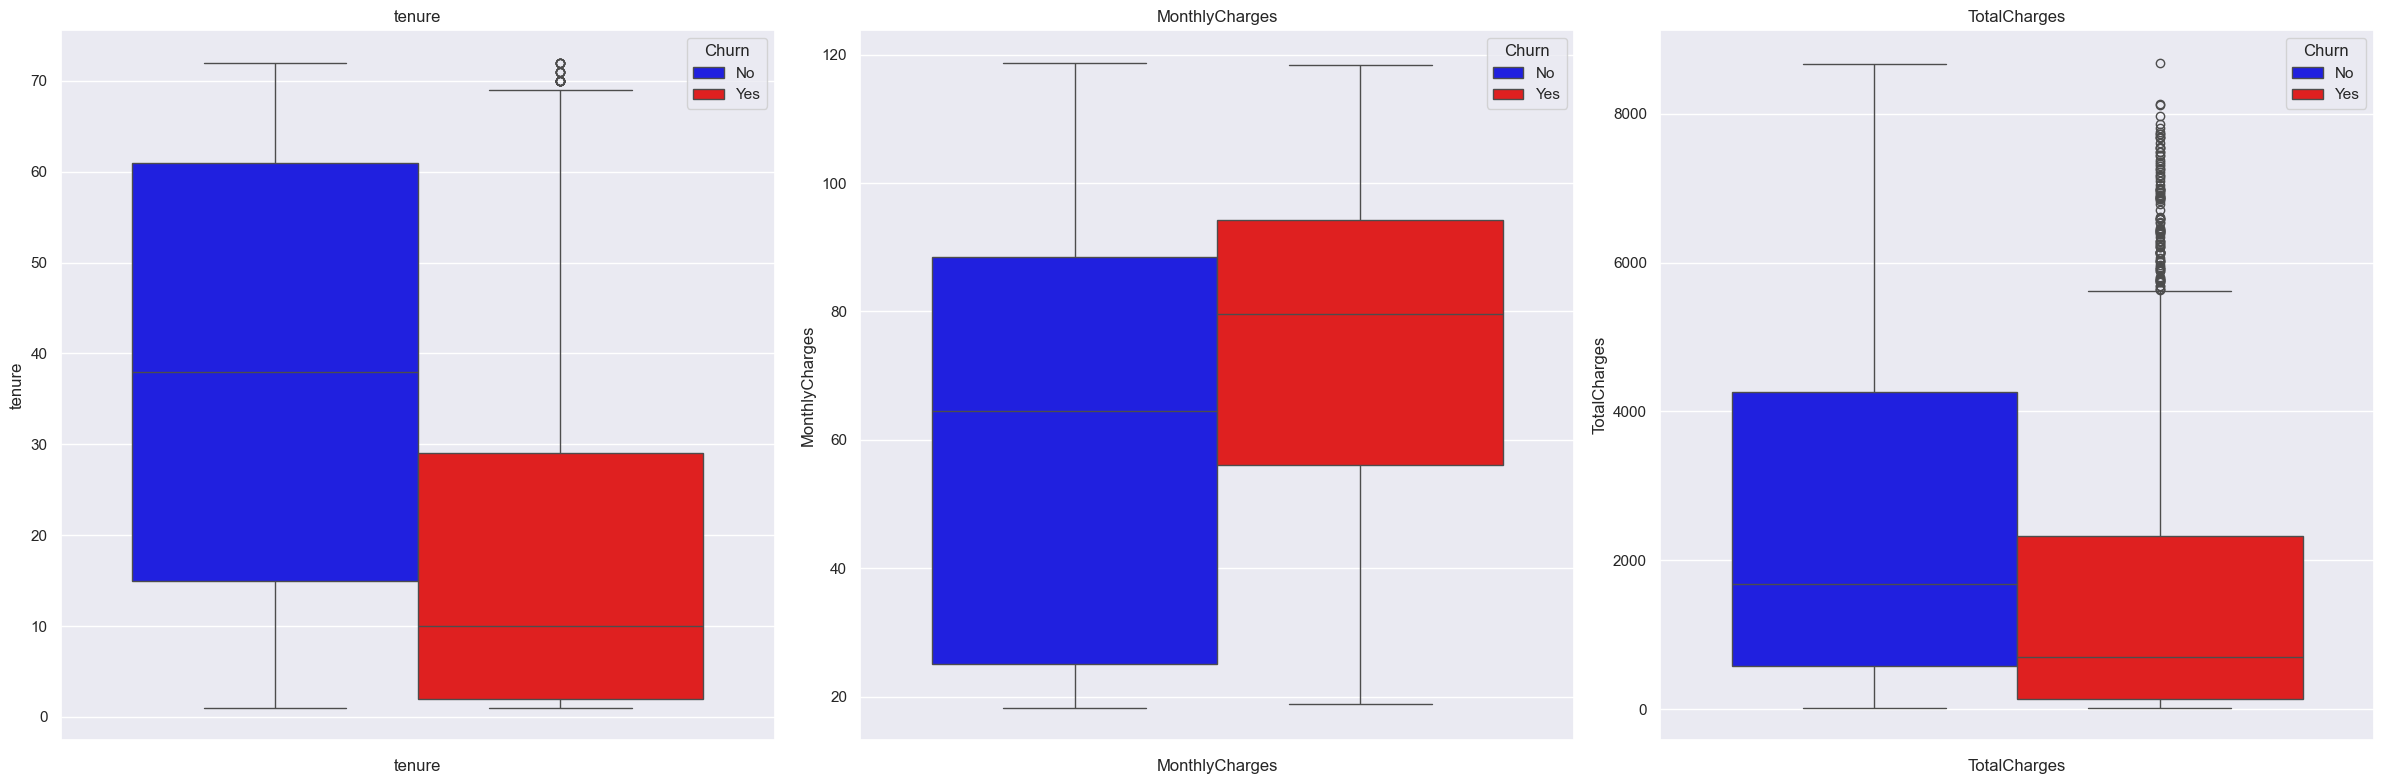

In [55]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(24, 8))
sns.set(palette=['Blue', 'Red'])
plotnumber = 1

for i in num_cols:
    ax = plt.subplot(1, 3, plotnumber)
    sns.boxplot(data=df, y=i, hue='Churn')
    plt.xlabel(i)
    plt.title(i)
    plotnumber += 1
    plt.tight_layout();

> **Outlier Kolom tenure**
> - Terdapat oulier atas pada kategori Churn berdasarkan kolom tenure.
> - Median pelanggan Churn lebih rendah dibandingkan median pada pelanggan Not Churn.

In [56]:
# Outlier tenure
df[(df['tenure'] > 65) & (df['Churn'] == 'Yes')].shape

(63, 21)

> Pelanggan yang telah lama menggunakan layanan telco namun tergolong pelanggan yang Churn terdapat sebanyak 63 pelanggan. Meskipun telah lama berlangganan, Churn dapat disebabkan oleh hal lainnya.

In [57]:
# Median MonthlyCharges pada Outlier tenure
df[(df['tenure'] > 65) & (df['Churn'] == 'Yes')]['MonthlyCharges'].median()

104.0

> Terlihat bahwa, pelanggan churn yang telah lama bergabung (> 65 bulan) memiliki median MonthlyCharge yang cukup tinggi yakni sebesar 104. Hal ini dapat menjadi indikasi bahwa meskipun, pelanggan telah lama bergabung, dengan tingginya tagihan bulanan yang dibebankan, maka pelanggan dapat menjadi Churn.

> Outlier tidak perlu dihilangkan sebab merupakan kandidat yang perlu perhatian untuk mencegah terjadi churn.

> **Outlier Kolom TotalCharges**
> - Terdapat oulier atas pada kategori Churn berdasarkan kolom TotalCharges.
> - Median TotalCharges pelanggan Not Churn lebih tinggi dibandingkan median TotalCharges pelanggan Churn.

In [58]:
# Outlier TotalCharges
df[(df['TotalCharges'] > 5500) & (df['Churn'] == 'Yes')].shape

(121, 21)

In [59]:
# Median tenure pada Outlier TotalCharges
df[(df['TotalCharges'] > 5500) & (df['Churn'] == 'Yes')]['tenure'].median()

64.0

In [60]:
# Median MonthlyCharges pada Outlier TotalCharges
df[(df['TotalCharges'] > 5500) & (df['Churn'] == 'Yes')]['MonthlyCharges'].median()

104.65

> Terdapat sebanyak 121 outlier atas pada kategori Churn berdasarkan kolom TotalCharges.

> Pelanggan Churn yang outlier tersebut memiliki median tenure 64 bulan sehingga termasuk pelanggan yang telah lama bergabung.

> Pelanggan Churn yang outlier tersebut juga memiliki median MonthlyCharges tinggi sebesar 104.65.

> Outlier tersebut merupakan kandidat utama perusahaan untuk evaluasi demi menghindari resiko Churn yang lebih besar pada pelanggan yang termasuk loyal.

#### **Bagaimana proporsi kelas target?**

In [61]:
proportion = df['Churn'].value_counts(normalize=True)*100
proportion

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [62]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

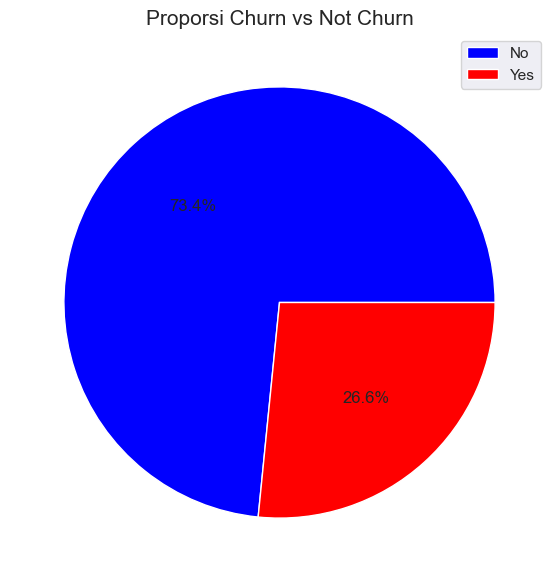

In [63]:
plt.figure(figsize=(7, 7))
plt.title('Proporsi Churn vs Not Churn', size=15)
plt.pie(proportion, autopct='%1.1f%%');
plt.legend(proportion.index)

> Sebanyak 73.4% data merupakan data pelanggan Not Churn sedangkan 26.6% sisanya merupakan pelanggan Churn. Hal ini menunjukkan adanya imbalanced target.

#### **Bagaimana distribus target Churn vs Not Churn berdasarkan karateristik kategorikal nya?**


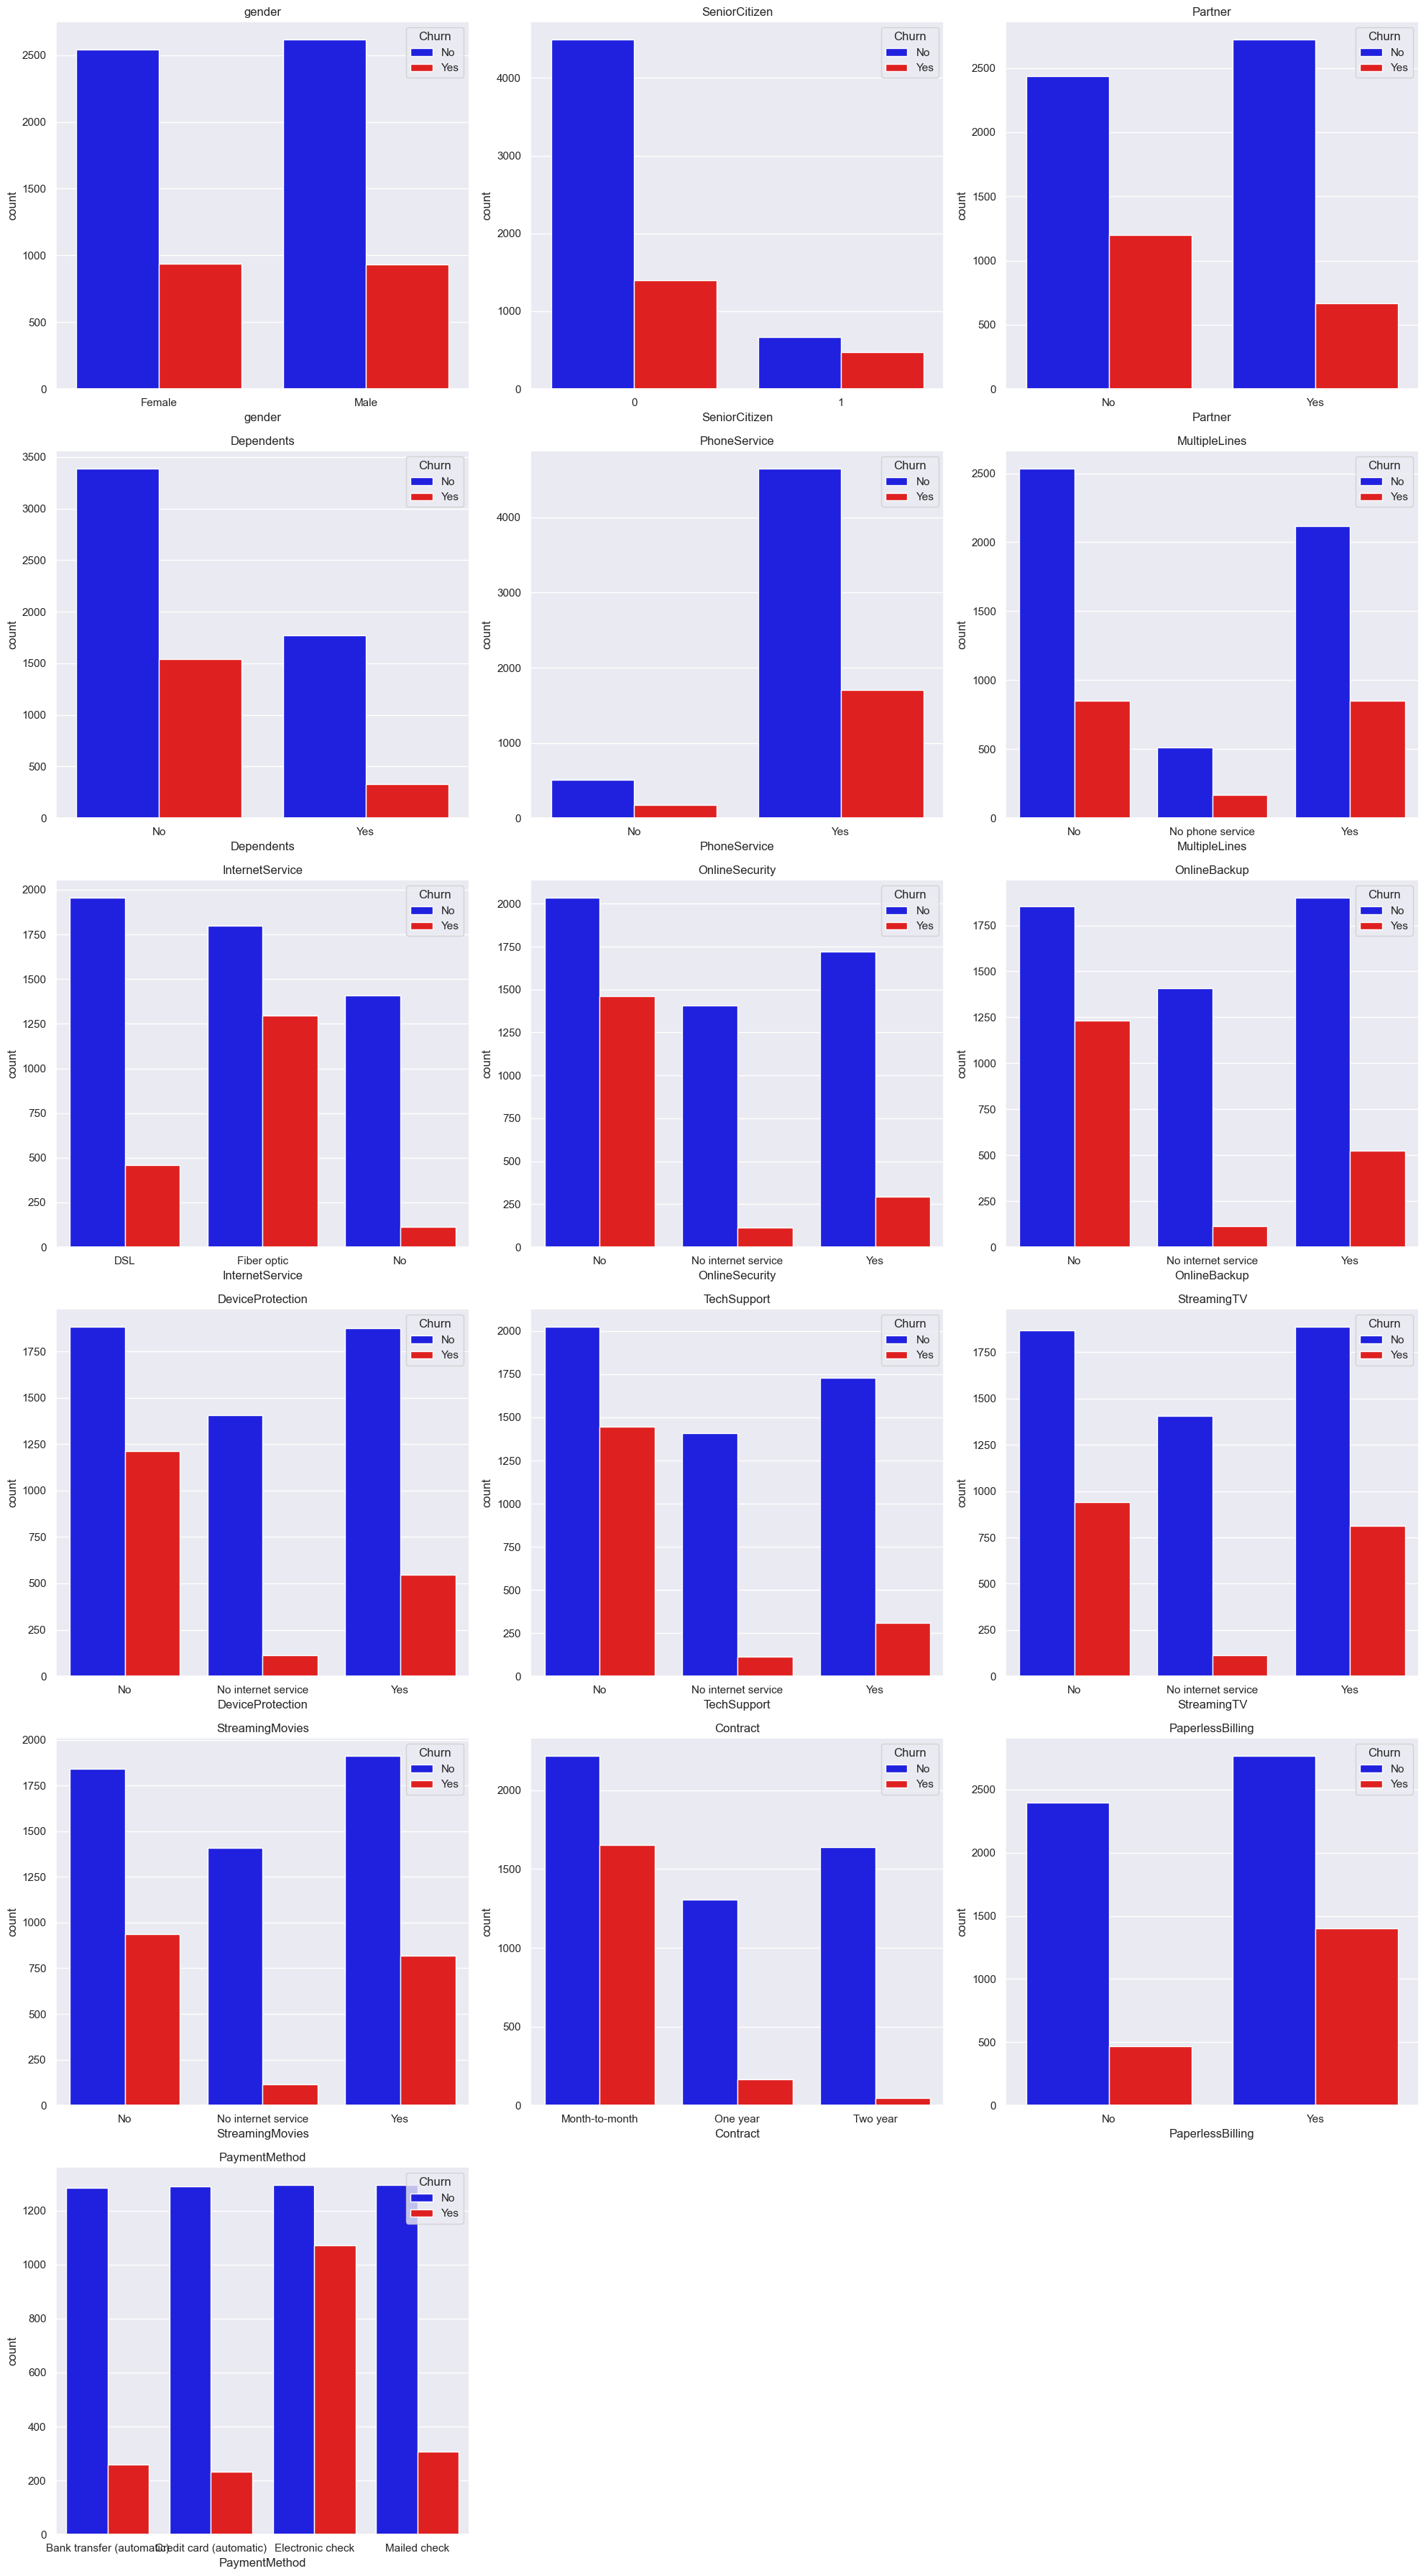

In [64]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

plt.figure(figsize=(20, 36))
sns.set(palette=['Blue', 'Red'])
plotnumber = 1

for i in cat_cols:
    ax = plt.subplot(6, 3, plotnumber)
    sns.countplot(data=df, x=i, hue='Churn')
    plt.xlabel(i)
    plt.title(i)
    plotnumber += 1
    plt.tight_layout();

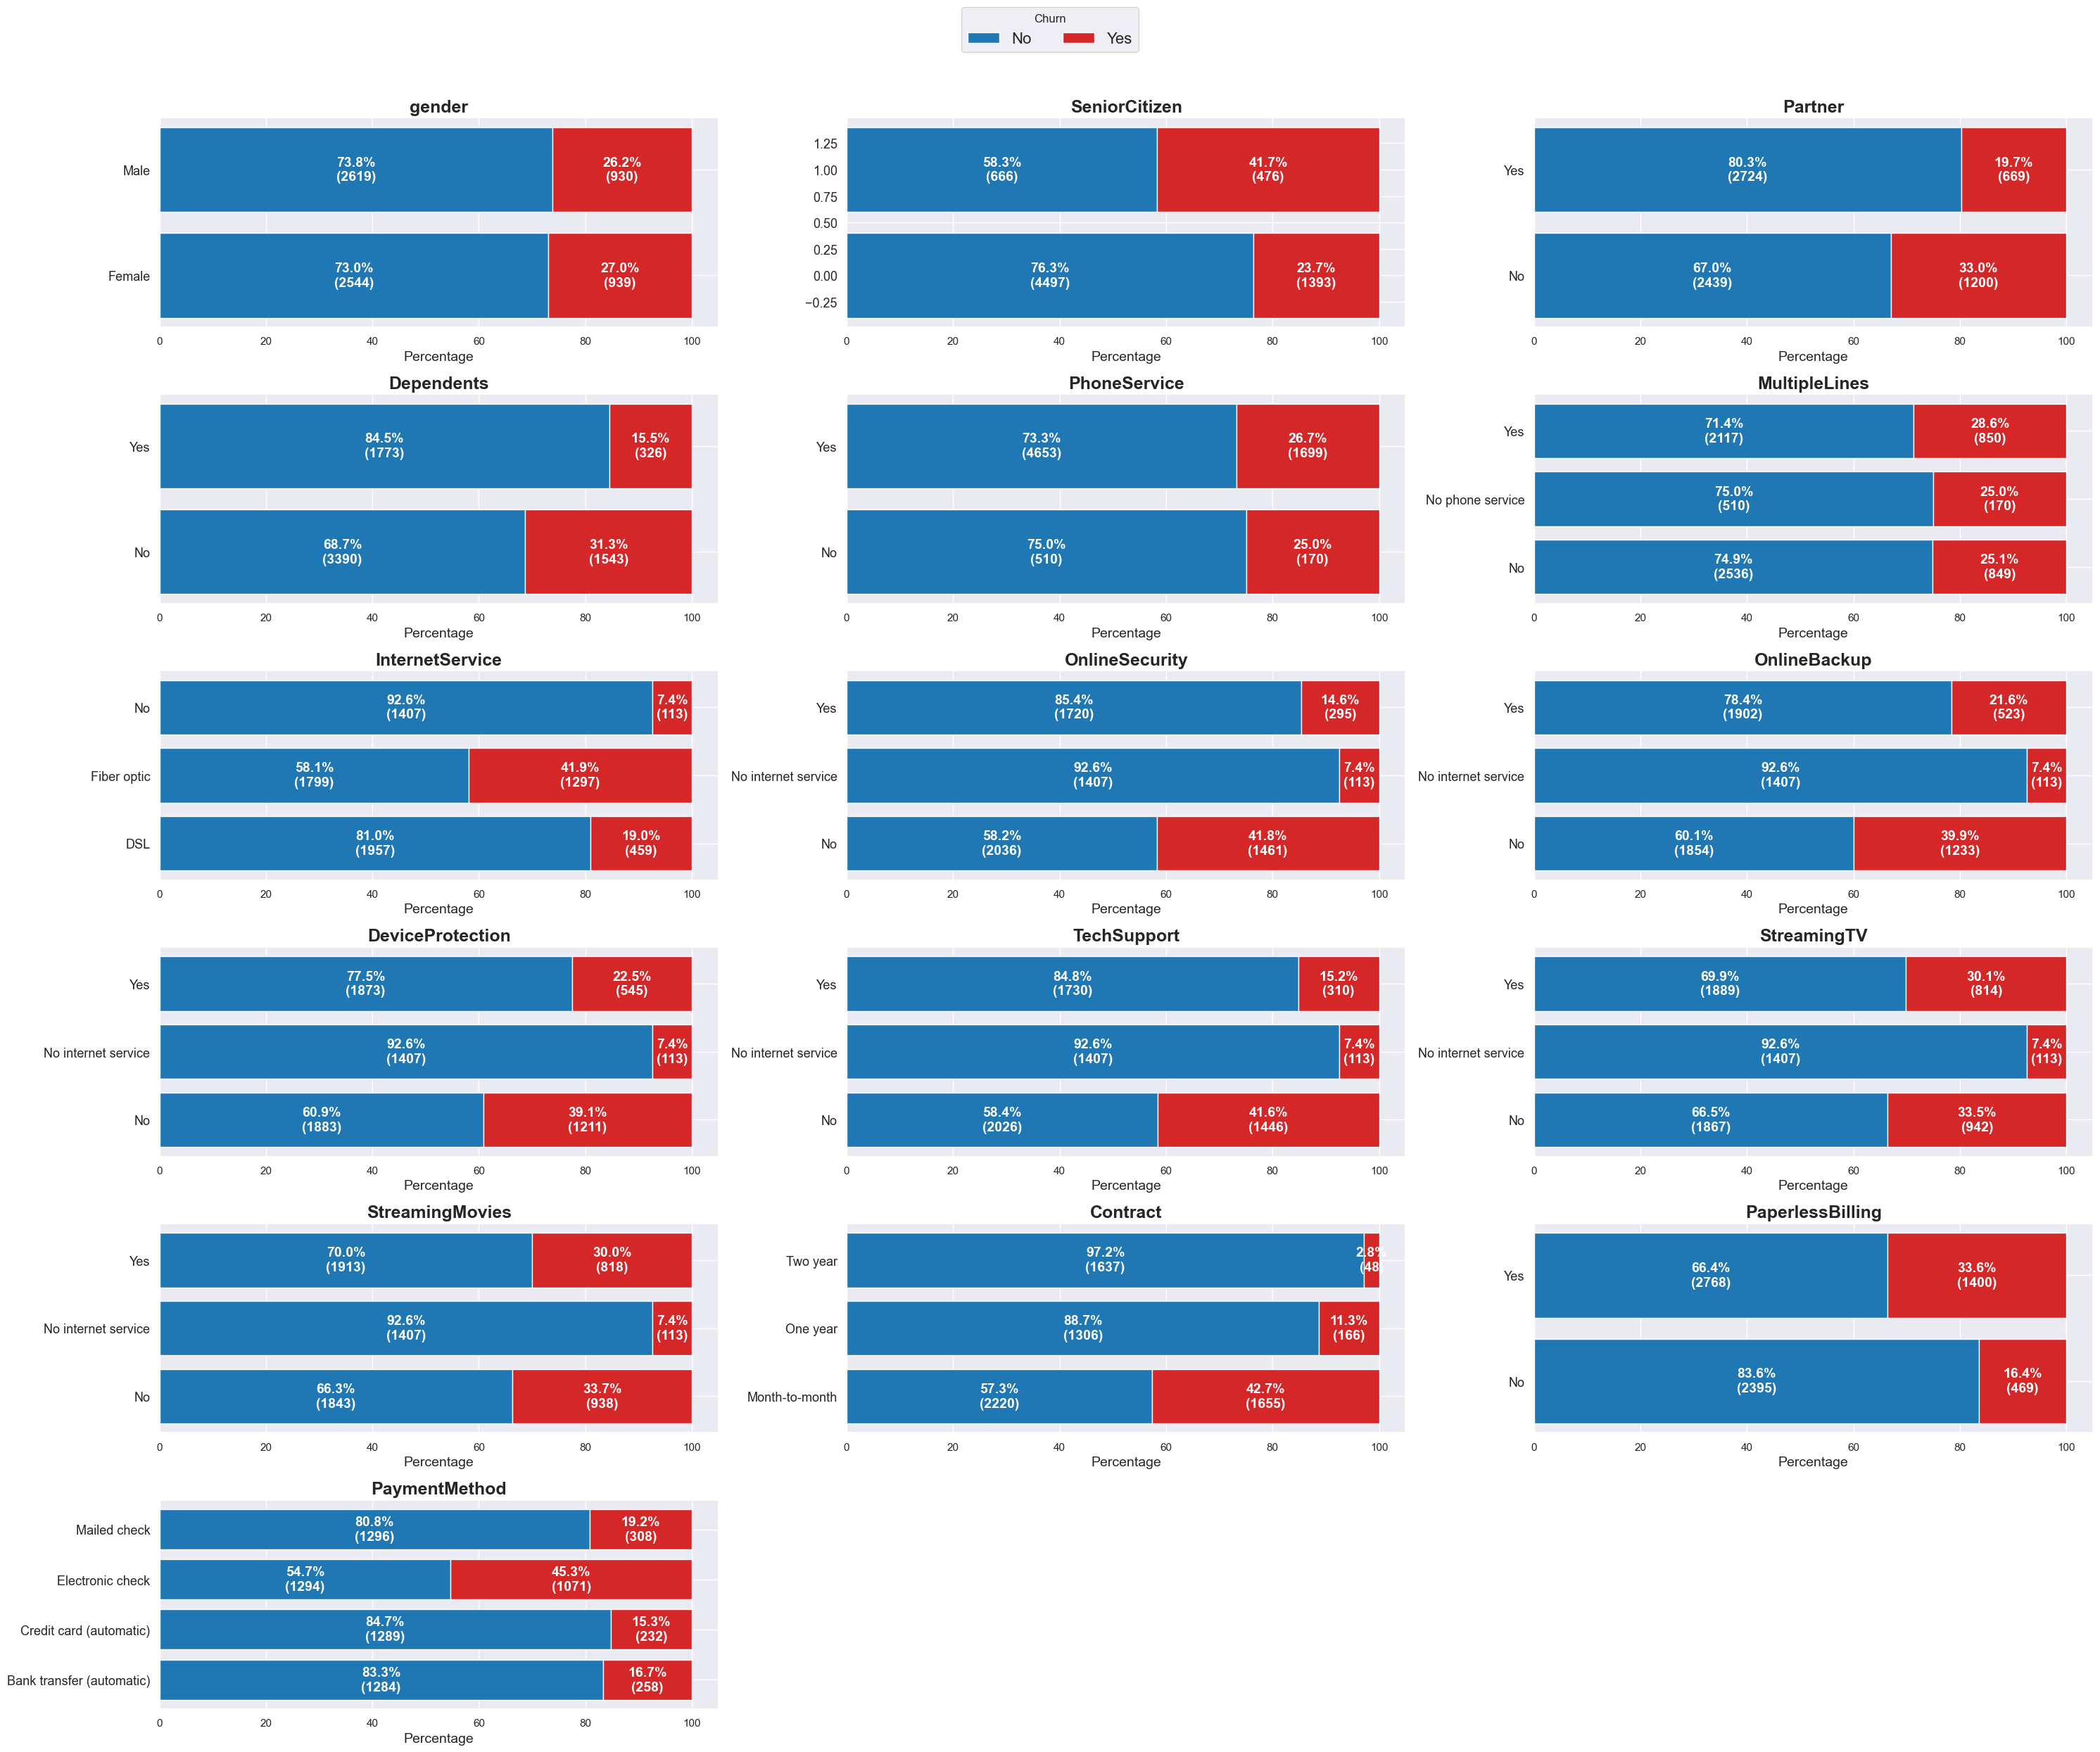

In [65]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

# Warna biru dan merah
colors = ['#1f77b4','#d62728']

# Buat figure dan axes
fig, axes = plt.subplots(6, 3, figsize=(30, 25))
axes = axes.flatten()

# Loop setiap kolom dan plot di subplot
for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    # Crosstab
    crosstab = pd.crosstab(df[col], df['Churn'])

    # Hitung persentase
    crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Untuk stacking
    left = [0]*crosstab_percent.shape[0]

    # Loop churn status
    for idx, churn_status in enumerate(crosstab_percent.columns):
        bars = ax.barh(
            crosstab_percent.index,
            crosstab_percent[churn_status],
            left=left,
            color=colors[idx],
            label=churn_status if i == 0 else ""
        )
        
        # Label dalam bar
        for bar, count, percent in zip(
            bars,
            crosstab[churn_status],
            crosstab_percent[churn_status]
        ):
            if percent > 0:
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{percent:.1f}%\n({count})",
                    ha='center',
                    va='center',
                    color='white',
                    fontsize=14,  # Ukuran label dalam bar diperbesar
                    fontweight='bold'
                )
        
        # Update posisi stacking
        left = [i+j for i,j in zip(left, crosstab_percent[churn_status])]
    
    # Set judul per subplot
    ax.set_title(col, fontsize=18, fontweight='bold')
    
    # Label sumbu X
    ax.set_xlabel("Percentage", fontsize=14)
    
    # Label kategori Y lebih besar
    ax.tick_params(axis='y', labelsize=13)
    
# Kosongkan subplot sisa jika ada
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Legend global
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Churn", loc='upper center', ncol=2, fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Bagaimana korelasi setiap fitur terhadap target?**


In [66]:
# Mapping Target
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No':0})

In [67]:
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_score = []

for i in corr_cols:
    corr_skor = df[i].corr(df['Churn'], method='spearman')
    correlation_score.append(corr_skor.round(2))

correlation_df = pd.DataFrame({'Column': corr_cols, 'Correlation Score': correlation_score})
correlation_df

,Column,Correlation Score
0,tenure,-0.37
1,MonthlyCharges,0.18
2,TotalCharges,-0.23


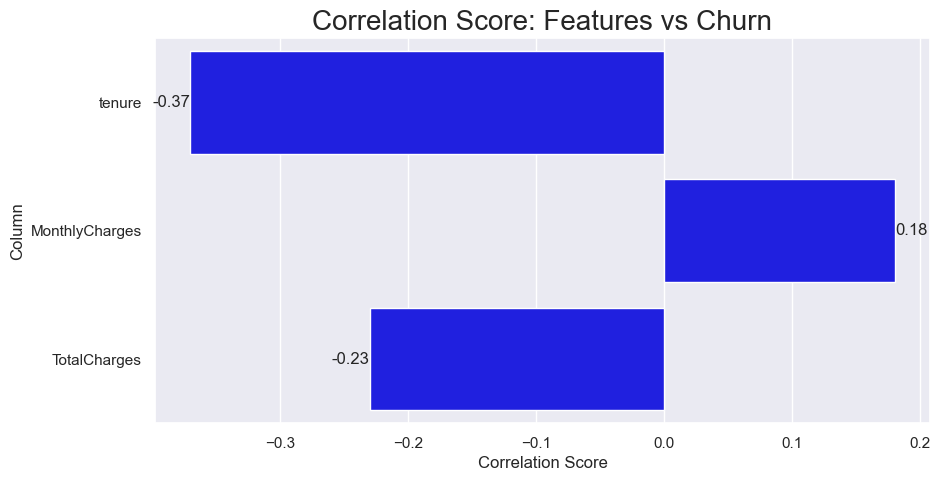

In [68]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Score: Features vs Churn', size=20)
barplot = sns.barplot(data=correlation_df, x='Correlation Score', y='Column', color='Blue');
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge');

## **3. Data Preparation**
- Define Features (X) and Target (y).
- Train - Test Splitting
- Data Pre-processing

### **Define Features (X) and Target (y)**

In [69]:
# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [70]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

### **Train-Test Splitting**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

### **Pre-Processing**
- Encoding
    + Onehot Encoding -->
- Scaling
    + Robust Scaling -->

In [72]:

transformer = ColumnTransformer([('onehot', 
                                  OneHotEncoder(drop='first'), 
                                  ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                   'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]),
                                   
                                   ('rbst',
                                    RobustScaler(), 
                                    ['tenure', 'MonthlyCharges', 'TotalCharges'])],
                                    
                                   remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('rbst', RobustScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

## **4. Cross Validation (Model Benchmark)**

In [73]:
# Base Learner
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)

# ensemble various
voting = VotingClassifier(estimators=[('logreg', logreg),
                                      ('knn', knn),
                                      ('dt', dt)]) 

stacking = StackingClassifier(estimators=[('logreg', logreg),
                                      ('knn', knn),
                                      ('dt', dt)])

# ensemble similar
bagging = BaggingClassifier(random_state=0, estimator=KNeighborsClassifier(), n_estimators=100)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0, use_label_encoder=False)
lgbm = LGBMClassifier(random_state=0)
catboost = CatBoostClassifier(random_state=0, train_dir=None)

In [74]:
list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb, lgbm, catboost]
list_all_score = []
list_mean_score = [] 
list_std = []
list_fit_time = []
list_score_time = []
f2_score = make_scorer(fbeta_score, beta=2)


for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross val F2 score
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        return_train_score=False,
        n_jobs=-1,
        error_score='raise'
    )
    
    # F2 score
    list_mean_score.append(crossval['test_score'].mean())
    list_std.append(crossval['test_score'].std())
    list_all_score.append(crossval['test_score'].round(2))
    list_fit_time.append(crossval['fit_time'].mean().round(2))
    list_score_time.append(crossval['score_time'].mean().round(2))

In [75]:
df_f2 = pd.DataFrame()
df_f2['Algo'] = list_model
df_f2['Score'] = list_all_score
df_f2['Mean Score F2'] = list_mean_score
df_f2['Std Score F2'] = list_std
df_f2['Fit Time'] = list_fit_time
df_f2['Score Time'] = list_score_time

df_f2.sort_values(by='Mean Score F2', ascending=False)

,Algo,Score,Mean Score F2,Std Score F2,Fit Time,Score Time
0,LogisticRegression(random_state=0),"[0.57, 0.59, 0.55, 0.59, 0.54]",0.565797,0.021877,0.08,0.02
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.57, 0.57, 0.54, 0.54, 0.54]",0.549608,0.013166,0.10,0.10
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.56, 0.58, 0.53, 0.56, 0.51]",0.548985,0.024637,0.48,0.05
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.54, 0.52, 0.57, 0.53, 0.53]",0.538783,0.016403,0.35,3.80
8,GradientBoostingClassifier(random_state=0),"[0.53, 0.56, 0.53, 0.54, 0.51]",0.536101,0.017303,1.10,0.03
1,KNeighborsClassifier(),"[0.55, 0.53, 0.56, 0.5, 0.52]",0.533488,0.019123,0.05,0.06
10,LGBMClassifier(random_state=0),"[0.55, 0.55, 0.5, 0.55, 0.52]",0.533159,0.020775,1.25,0.05
9,"XGBClassifier(base_score=None, booster=None, c...","[0.56, 0.53, 0.51, 0.56, 0.5]",0.532722,0.026536,0.34,0.04
11,<catboost.core.CatBoostClassifier object at 0x...,"[0.53, 0.54, 0.51, 0.56, 0.51]",0.529934,0.016929,6.61,0.04
7,AdaBoostClassifier(random_state=0),"[0.5, 0.57, 0.52, 0.54, 0.51]",0.528583,0.026107,0.35,0.03


## **5. Remodelling and Resampling (SMOTE)**

In [76]:
smote = SMOTE(sampling_strategy='minority', random_state=0)

In [77]:
list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb, lgbm, catboost]
list_all_score = []
list_mean_score = [] 
list_std = []
list_fit_time = []
list_score_time = []
f2_score = make_scorer(fbeta_score, beta=2)


for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote),
        ('modeling', model)
    ])

    # cross val F2 score
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        return_train_score=False,
        n_jobs=-1,
        error_score='raise'
    )
    
    # F2 score
    list_mean_score.append(crossval['test_score'].mean())
    list_std.append(crossval['test_score'].std())
    list_all_score.append(crossval['test_score'].round(2))
    list_fit_time.append(crossval['fit_time'].mean().round(2))
    list_score_time.append(crossval['score_time'].mean().round(2))

In [78]:
df_f2_smote = pd.DataFrame()
df_f2_smote['Algo'] = list_model
df_f2_smote['Score'] = list_all_score
df_f2_smote['Mean Score F2'] = list_mean_score
df_f2_smote['Std Score F2'] = list_std
df_f2_smote['Fit Time'] = list_fit_time
df_f2_smote['Score Time'] = list_score_time

df_f2_smote.sort_values(by='Mean Score F2', ascending=False)

,Algo,Score,Mean Score F2,Std Score F2,Fit Time,Score Time
0,LogisticRegression(random_state=0),"[0.72, 0.74, 0.7, 0.72, 0.72]",0.716017,0.012327,0.10,0.02
7,AdaBoostClassifier(random_state=0),"[0.71, 0.71, 0.66, 0.69, 0.69]",0.690147,0.017542,0.59,0.04
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.68, 0.68, 0.69, 0.68, 0.64]",0.676244,0.017217,0.15,0.08
8,GradientBoostingClassifier(random_state=0),"[0.67, 0.68, 0.65, 0.65, 0.65]",0.659942,0.013666,1.97,0.03
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.64, 0.65, 0.66, 0.63, 0.62]",0.639417,0.013256,0.68,5.32
1,KNeighborsClassifier(),"[0.64, 0.64, 0.65, 0.63, 0.61]",0.634077,0.014036,0.06,0.07
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.65, 0.61, 0.65, 0.64, 0.6]",0.628719,0.022140,0.78,0.07
10,LGBMClassifier(random_state=0),"[0.61, 0.62, 0.56, 0.62, 0.61]",0.604858,0.021470,1.70,0.06
11,<catboost.core.CatBoostClassifier object at 0x...,"[0.61, 0.58, 0.59, 0.62, 0.57]",0.592393,0.018180,9.64,0.04
6,RandomForestClassifier(random_state=0),"[0.58, 0.58, 0.59, 0.6, 0.56]",0.583031,0.012295,1.25,0.07


## **6. Remodelling and Resampling (SMOTE-Tomek)**

In [79]:
smote_tomek = SMOTETomek(sampling_strategy='minority', random_state=0)

list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb, lgbm, catboost]
list_all_score = []
list_mean_score = [] 
list_std = []
list_fit_time = []
list_score_time = []
f2_score = make_scorer(fbeta_score, beta=2)


for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote_tomek),
        ('modeling', model)
    ])

    # cross val F2 score
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        return_train_score=False,
        n_jobs=-1,
        error_score='raise'
    )
    
    # F2 score
    list_mean_score.append(crossval['test_score'].mean())
    list_std.append(crossval['test_score'].std())
    list_all_score.append(crossval['test_score'].round(2))
    list_fit_time.append(crossval['fit_time'].mean().round(2))
    list_score_time.append(crossval['score_time'].mean().round(2))

In [80]:
df_f2_smotetomek = pd.DataFrame()
df_f2_smotetomek['Algo'] = list_model
df_f2_smotetomek['Score'] = list_all_score
df_f2_smotetomek['Mean Score F2'] = list_mean_score
df_f2_smotetomek['Std Score F2'] = list_std
df_f2_smotetomek['Fit Time'] = list_fit_time
df_f2_smotetomek['Score Time'] = list_score_time

df_f2_smotetomek.sort_values(by='Mean Score F2', ascending=False)

,Algo,Score,Mean Score F2,Std Score F2,Fit Time,Score Time
0,LogisticRegression(random_state=0),"[0.72, 0.74, 0.69, 0.71, 0.72]",0.715686,0.013178,0.47,0.02
7,AdaBoostClassifier(random_state=0),"[0.69, 0.71, 0.67, 0.69, 0.68]",0.690666,0.013382,0.88,0.04
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.68, 0.67, 0.7, 0.67, 0.65]",0.672332,0.015168,0.46,0.07
8,GradientBoostingClassifier(random_state=0),"[0.66, 0.68, 0.65, 0.65, 0.65]",0.658008,0.012068,2.26,0.02
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.65, 0.65, 0.67, 0.64, 0.62]",0.644936,0.016466,2.75,5.49
1,KNeighborsClassifier(),"[0.65, 0.64, 0.66, 0.63, 0.63]",0.641924,0.012375,0.38,0.06
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.63, 0.6, 0.63, 0.63, 0.61]",0.619336,0.013711,1.15,0.06
10,LGBMClassifier(random_state=0),"[0.62, 0.6, 0.58, 0.61, 0.59]",0.600158,0.013292,1.55,0.03
11,<catboost.core.CatBoostClassifier object at 0x...,"[0.62, 0.59, 0.6, 0.61, 0.56]",0.596226,0.019948,9.53,0.05
6,RandomForestClassifier(random_state=0),"[0.59, 0.58, 0.6, 0.61, 0.57]",0.589338,0.012339,1.50,0.05


## **7. Remodelling and Resampling (SMOTE-ENN)**

In [81]:
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=0)

list_model = [logreg, knn, dt, voting, stacking, bagging, rf, adaboost, gradboost, xgb, lgbm, catboost]
list_all_score = []
list_mean_score = [] 
list_std = []
list_fit_time = []
list_score_time = []
f2_score = make_scorer(fbeta_score, beta=2)


for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote_enn),
        ('modeling', model)
    ])

    # cross val F2 score
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        return_train_score=False,
        n_jobs=-1,
        error_score='raise'
    )
    
    # F2 score
    list_mean_score.append(crossval['test_score'].mean())
    list_std.append(crossval['test_score'].std())
    list_all_score.append(crossval['test_score'].round(2))
    list_fit_time.append(crossval['fit_time'].mean().round(2))
    list_score_time.append(crossval['score_time'].mean().round(2))

In [82]:
df_f2_smoteenn = pd.DataFrame()
df_f2_smoteenn['Algo'] = list_model
df_f2_smoteenn['Score'] = list_all_score
df_f2_smoteenn['Mean Score F2'] = list_mean_score
df_f2_smoteenn['Std Score F2'] = list_std
df_f2_smoteenn['Fit Time'] = list_fit_time
df_f2_smoteenn['Score Time'] = list_score_time

df_f2_smoteenn.sort_values(by='Mean Score F2', ascending=False)

,Algo,Score,Mean Score F2,Std Score F2,Fit Time,Score Time
7,AdaBoostClassifier(random_state=0),"[0.74, 0.76, 0.71, 0.75, 0.74]",0.740889,0.014883,0.70,0.04
8,GradientBoostingClassifier(random_state=0),"[0.74, 0.74, 0.71, 0.73, 0.75]",0.734541,0.014902,1.54,0.02
0,LogisticRegression(random_state=0),"[0.74, 0.74, 0.71, 0.76, 0.72]",0.732933,0.018118,0.44,0.02
3,"VotingClassifier(estimators=[('logreg', Logist...","[0.73, 0.74, 0.71, 0.76, 0.71]",0.729555,0.018389,0.51,0.06
11,<catboost.core.CatBoostClassifier object at 0x...,"[0.73, 0.73, 0.7, 0.74, 0.72]",0.721940,0.015577,8.29,0.05
6,RandomForestClassifier(random_state=0),"[0.73, 0.74, 0.7, 0.73, 0.71]",0.719064,0.013662,1.02,0.04
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.72, 0.72, 0.69, 0.75, 0.71]",0.718878,0.018250,0.69,3.47
1,KNeighborsClassifier(),"[0.71, 0.72, 0.69, 0.75, 0.71]",0.715838,0.018252,0.40,0.06
4,"StackingClassifier(estimators=[('logreg', Logi...","[0.72, 0.73, 0.69, 0.74, 0.69]",0.715704,0.021330,0.84,0.09
10,LGBMClassifier(random_state=0),"[0.74, 0.72, 0.69, 0.72, 0.71]",0.715479,0.015218,1.90,0.03


## **8. Adaboost with Various Estimators**

In [83]:
adaboost_dt = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0))
adaboost_logreg = AdaBoostClassifier(estimator=LogisticRegression(random_state=0))
adaboost_rf = AdaBoostClassifier(estimator=RandomForestClassifier(random_state=0))

smote_enn = SMOTEENN(sampling_strategy='minority', random_state=0)

list_model = [adaboost, adaboost_dt, adaboost_logreg, adaboost_rf]
list_all_score = []
list_mean_score = [] 
list_std = []
list_fit_time = []
list_score_time = []
f2_score = make_scorer(fbeta_score, beta=2)


for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote_enn),
        ('modeling', model)
    ])

    # cross val F2 score
    crossval = cross_validate(
        estimator=pipe_prep_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2_score,
        return_train_score=False,
        n_jobs=-1,
        error_score='raise'
    )
    
    # F2 score
    list_mean_score.append(crossval['test_score'].mean())
    list_std.append(crossval['test_score'].std())
    list_all_score.append(crossval['test_score'].round(2))
    list_fit_time.append(crossval['fit_time'].mean().round(2))
    list_score_time.append(crossval['score_time'].mean().round(2))

In [84]:
df_adaboost_smoteenn = pd.DataFrame()
df_adaboost_smoteenn['Algo'] = list_model
df_adaboost_smoteenn['Score'] = list_all_score
df_adaboost_smoteenn['Mean Score F2'] = list_mean_score
df_adaboost_smoteenn['Std Score F2'] = list_std
df_adaboost_smoteenn['Fit Time'] = list_fit_time
df_adaboost_smoteenn['Score Time'] = list_score_time

df_adaboost_smoteenn.sort_values(by='Mean Score F2', ascending=False)

,Algo,Score,Mean Score F2,Std Score F2,Fit Time,Score Time
0,AdaBoostClassifier(random_state=0),"[0.74, 0.76, 0.71, 0.75, 0.74]",0.740889,0.014883,0.75,0.03
3,AdaBoostClassifier(estimator=RandomForestClass...,"[0.73, 0.73, 0.7, 0.73, 0.72]",0.722936,0.010486,1.04,0.04
2,AdaBoostClassifier(estimator=LogisticRegressio...,"[0.74, 0.73, 0.7, 0.73, 0.72]",0.722078,0.012755,0.50,0.02
1,AdaBoostClassifier(estimator=DecisionTreeClass...,"[0.69, 0.7, 0.67, 0.68, 0.67]",0.683015,0.012011,0.38,0.02


## **9. Hyperparameter Tuning**

In [88]:
f2_score = make_scorer(fbeta_score, beta=2)
smote_enn = SMOTEENN(random_state=0, sampling_strategy='minority')
adaboost = AdaBoostClassifier(random_state=0, estimator=DecisionTreeClassifier(random_state=0))

# Pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', smote_enn),
    ('modeling', adaboost)
])

# hyperparam
hyperparam = {
    'modeling__n_estimators': [50, 100, 200],
    'modeling__learning_rate': [0.01, 0.1, 0.5, 1],
    'modeling__estimator__max_depth': [1,3,5,7,9]
}

# Randomized search
randomizedsearch = RandomizedSearchCV(
    estimator = pipe_prep_model,
    cv = 5,
    n_jobs = -1,
    param_distributions = hyperparam,
    scoring = f2_score,
    n_iter = 100
)

In [89]:
randomizedsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMo...
                                                       sampling_strategy='minority')),
                                             ('modeling',
                                              AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                                                                 random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'modeling__estimator__max_depth': [1, 3,
                                                                           5, 7,
                                                                           9],
                                        'modeling__learning_rate': [0.01, 0.1,
                                                                    0.5, 1],
                                        'modeling__n_estimators': [50, 100,
                                                                   200]},
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))